In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()   # setting the default Seaborn theme

Befor getting to the cost function of a regression model, I would like to plot $x^2 + y^2$ in a 3d space. So, we can also see how the contours of this function help us find the minimum of a plot.

In [3]:
# create two NumPy arrays values between -10 and 10, with a step size of 0.5
x = np.arange(-10, 10, 0.5)
y = np.arange(-10, 10, 0.5)

`np.meshgrid` is a NumPy function that returns coordinate matrices from coordinate vectors.
Given two 1D arrays, it returns two 2D matrices. The first matrix represents the X-coordinates of the points on a grid and the second matrix represents the Y-coordinates of the points on a grid.

In [4]:
# create a rectangular grid out of two given one-dimensional arrays
X, Y = np.meshgrid(x,y)

print(X.shape, '\n')
print('X =\n', X, '\n')
print('Y =\n', Y)

(40, 40) 

X =
 [[-10.   -9.5  -9.  ...   8.5   9.    9.5]
 [-10.   -9.5  -9.  ...   8.5   9.    9.5]
 [-10.   -9.5  -9.  ...   8.5   9.    9.5]
 ...
 [-10.   -9.5  -9.  ...   8.5   9.    9.5]
 [-10.   -9.5  -9.  ...   8.5   9.    9.5]
 [-10.   -9.5  -9.  ...   8.5   9.    9.5]] 

Y =
 [[-10.  -10.  -10.  ... -10.  -10.  -10. ]
 [ -9.5  -9.5  -9.5 ...  -9.5  -9.5  -9.5]
 [ -9.   -9.   -9.  ...  -9.   -9.   -9. ]
 ...
 [  8.5   8.5   8.5 ...   8.5   8.5   8.5]
 [  9.    9.    9.  ...   9.    9.    9. ]
 [  9.5   9.5   9.5 ...   9.5   9.5   9.5]]


In [5]:
Z = X ** 2 + Y ** 2    # assume that this is the cost function to be minimized

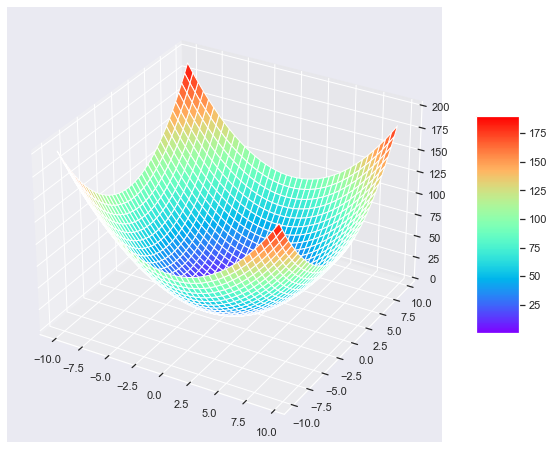

In [6]:
fig = plt.figure(figsize=(12, 8)) # specify size of 12x8

# an object of the Axes3D class, which is used to create a 3D plot
ax = fig.gca(projection='3d') 

# create the surface using the X, Y, and Z arrays
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.rainbow)

# add a color bar to the plot
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

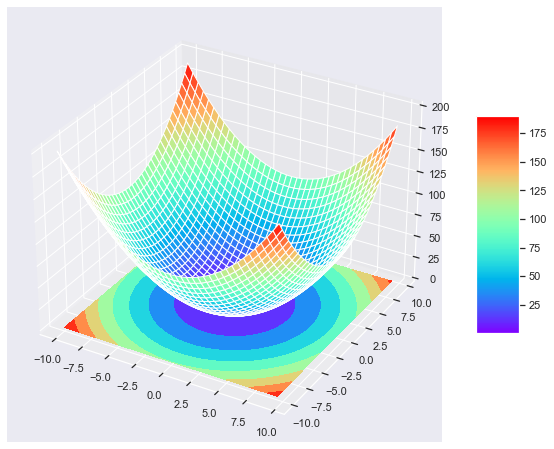

In [7]:
fig = plt.figure(figsize=(12, 8)) # specify size of 12x8

# an object of the Axes3D class, which is used to create a 3D plot
ax = fig.gca(projection='3d')

# create the surface using the X, Y, and Z arrays
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.rainbow)

# create a contour plot projected onto the z-axis
cset = ax.contourf(X, Y, Z, zdir='z', offset=0, cmap=plt.cm.rainbow)

# add a color bar to the plot
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

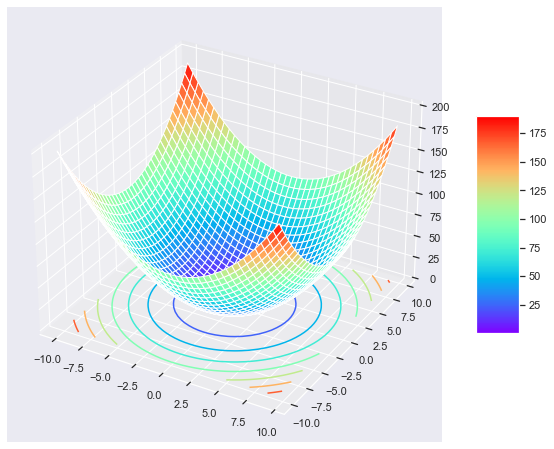

In [8]:
fig = plt.figure(figsize=(12, 8)) # specify size of 12x8

# an object of the Axes3D class, which is used to create a 3D plot
ax = fig.gca(projection='3d')

# create the surface using the X, Y, and Z arrays
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.rainbow)

# use contour instead of contourf to draw only the contour lines
cset = ax.contour(X, Y, Z, zdir='z', offset=0, cmap=plt.cm.rainbow)

# add a color bar to the plot
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

The cost function for a regression model typically measures the difference between the predicted output of the model $f(x)$ and the actual output. A commonly used cost function for linear regression is the mean squared error (MSE), which is defined as: 
$MSE = \frac{1}{n} \sum_i (y_i - f(x_i))^2$

where $n$ is the number of training examples, $y_i$ is the actual output for the i-th training example, and $f(x_i)$ is the predicted output for the i-th training example. The cost function is minimized by adjusting the model's parameters (e.g., weights $w$ and biases $b$) during training to minimize the difference between the predicted and actual output.

Now, lets try an example. We generate random values for `y` when `x` is integers from 1 to 10. Then, we try different values for coeficients of line $f(x) = b + wx$ to estimate the cost of our prediction.

In [9]:
# some simple random (close to linear) data
x = np.arange(1,11)
y = x + 1.5 * np.random.randn(10)

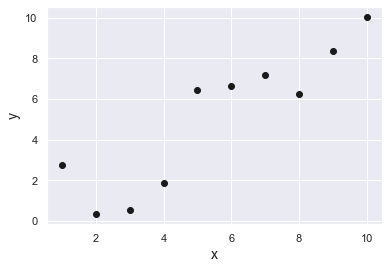

In [10]:
plt.plot(x, y, 'o', color='k', label='training data');  # data points

plt.xlabel('x', size = 14)
plt.ylabel('y', size = 14)
plt.show()

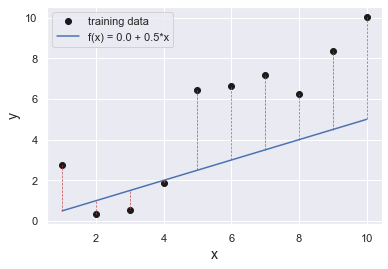

In [11]:
b = 0     # intercept
w = 0.5   # slope
f = lambda x : b + w*x  # fitted line

plt.plot(x, y, 'o', color='k', label='training data')  # data points

plt.plot(x, f(x), label='f(x) = %.1f + %.1f*x' %(b,w)) # fitted line

for i in range(len(x)):  # gap between actual point and predicted
    plt.plot([x[i], x[i]], [f(x[i]), y[i]], ls='--', color='r', lw=.7)

plt.xlabel('x', size = 14)
plt.ylabel('y', size = 14)
plt.legend()
plt.show()

As you see, our gusse for coefficients of the line are not necessraily work well. Let's assume that $b=0$ and plot the cost for different values of $w$ to see for what $w$ the cost is minimum.

In [12]:
# a function to calculate cost J
def cost(b, w, x, y):
    m = len(x)  # number of data points
    J = 0       # initialize J
    for i in range(m):
        J += ((b + w*x[i]) - y[i] )**2
    return J/m

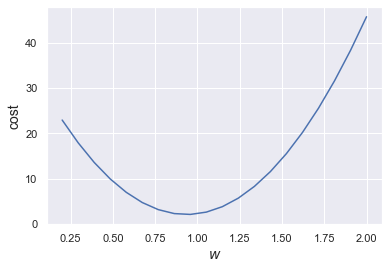

In [13]:
w = np.linspace(.2, 2, 20)

# for the fixed b, draw cost for various w between 0.2 and 2
plt.plot(w, cost(0, w ,x ,y))  

plt.xlabel('$w$', size = 14)
plt.ylabel('cost', size = 14)
plt.show()

For a simple univariate linear regression model, the cost function depends on changing in two variables: $b$ and $w$. However, for simplicity, we assume that $b=0$, but we should optimize both at the same time. As shown above, if $b=0$, the cost is minimum when $w$ is around 1. 

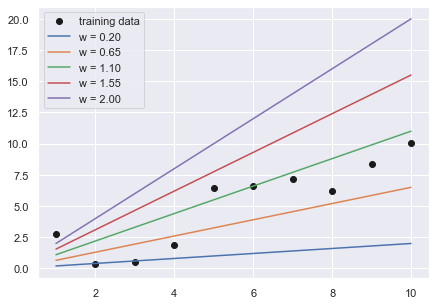

In [14]:
fig = plt.figure(figsize=(7,5))

plt.plot(x,y, 'o', color='k', label='training data')

w = np.linspace(0.2, 2 ,5)

for i in range(len(w)):
    plt.plot(x, 0+w[i]*x, label='w = %.2f' %w[i] )
    
plt.legend()
plt.show()

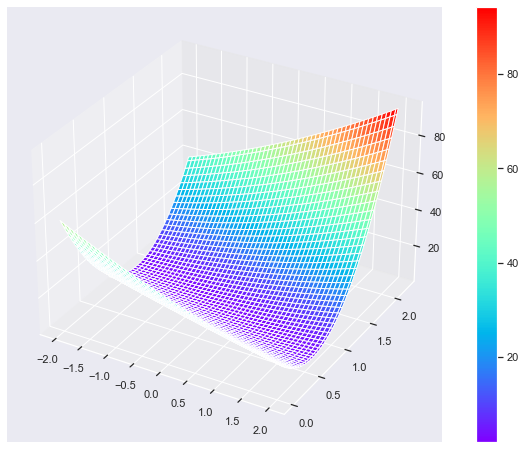

In [15]:
fig = plt.figure(figsize=(12,8))

ax = fig.gca(projection='3d')

b = np.linspace(-2,2,100)
w = np.linspace(0,2.2,100)

B, W = np.meshgrid(b, w)
Z = cost(B, W, x, y)

surf = ax.plot_surface(B, W, Z, cmap=plt.cm.rainbow)
fig.colorbar(surf)

plt.show()

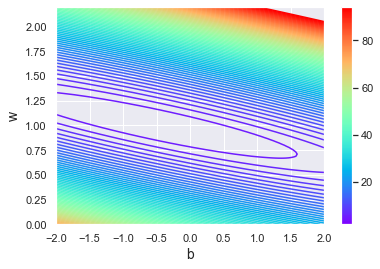

In [16]:
fig = plt.figure()

plt.contour(B, W, Z, levels=[i for i in np.arange(0,80)], cmap=plt.cm.rainbow)
fig.colorbar(surf)

plt.xlabel('b', size = 14)
plt.ylabel('w', size = 14)
plt.show()

As you see from the above contour plot, we can see what combinations of $b$ and $w$ gives the least cost.